In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Creates Pandas Dataframes, Gen Info about Dataframes
carbon_dioxide_df = pd.read_csv('Data/UN Global Carbon Dioxide Data.csv')
methane_df = pd.read_csv('Data/UN Global Methane Data.csv') # Main DataFrame read from file

print(f"Carbon Dioxide: {carbon_dioxide_df.columns}")
print(f"Methane Data: {methane_df.columns}\n")

# Num. of Countries/Years
print(f"Carbon Dioxide")
print(f"Years: {carbon_dioxide_df['Year'].min()}-{carbon_dioxide_df['Year'].max()}")
print(f"Countries: {len(carbon_dioxide_df['Country or Area'].unique())}")
print(f"Average Emissions: {round(carbon_dioxide_df['Value'].mean(),2)} ± {round(carbon_dioxide_df['Value'].std(),2)}")

print(f"\nMethane")
print(f"Years: {methane_df['Year'].min()}-{methane_df['Year'].max()}")
print(f"Countries: {len(methane_df['Country or Area'].unique())}")
print(f"Average Emissions: {round(methane_df['Value'].mean(),2)} ± {round(methane_df['Value'].std(),2)}")

Carbon Dioxide: Index(['Country or Area', 'Year', 'Value'], dtype='object')
Methane Data: Index(['Country or Area', 'Year', 'Value'], dtype='object')

Carbon Dioxide
Years: 1990-2021
Countries: 43
Average Emissions: 409119.07 ± 994921.46

Methane
Years: 1990-2021
Countries: 43
Average Emissions: 62773.23 ± 146335.63


In [4]:
# How many countries out of 43 have data from 1990-2021
print(f"Carbon Dioxide\n1990:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==1990])}"
      f"\n2020:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==2020])}"
      f"\n2021:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==2021])}")

print(f"\nMethane\n1990:{len(methane_df[methane_df['Year']==1990])}"
      f"\n2020:{len(methane_df[methane_df['Year']==2020])}"
      f"\n2021:{len(methane_df[methane_df['Year']==2021])}")

# One country does not have data for 2021 for either carbon dioxide or methane, so will remove 2021 years and only work with 1990-2020

carbon_dioxide_df = carbon_dioxide_df[(carbon_dioxide_df['Year']==1990) | (carbon_dioxide_df['Year']==2020)]
methane_df = methane_df[(methane_df['Year']==1990) | (methane_df['Year']==2020)]


Carbon Dioxide
1990:43
2020:43
2021:0

Methane
1990:43
2020:43
2021:0
               Country or Area  Year          Value
0                    Australia  2020   97303.735168
30                   Australia  1990  125133.249409
32                     Austria  2020    6502.903997
62                     Austria  1990   11318.847160
64                     Belarus  2020   17678.089839
...                        ...   ...            ...
1310                   Ukraine  1990  182891.681396
1312            United Kingdom  2020   52265.807627
1342            United Kingdom  1990  145315.661611
1344  United States of America  2020  742248.620060
1374  United States of America  1990  868661.001477

[86 rows x 3 columns]


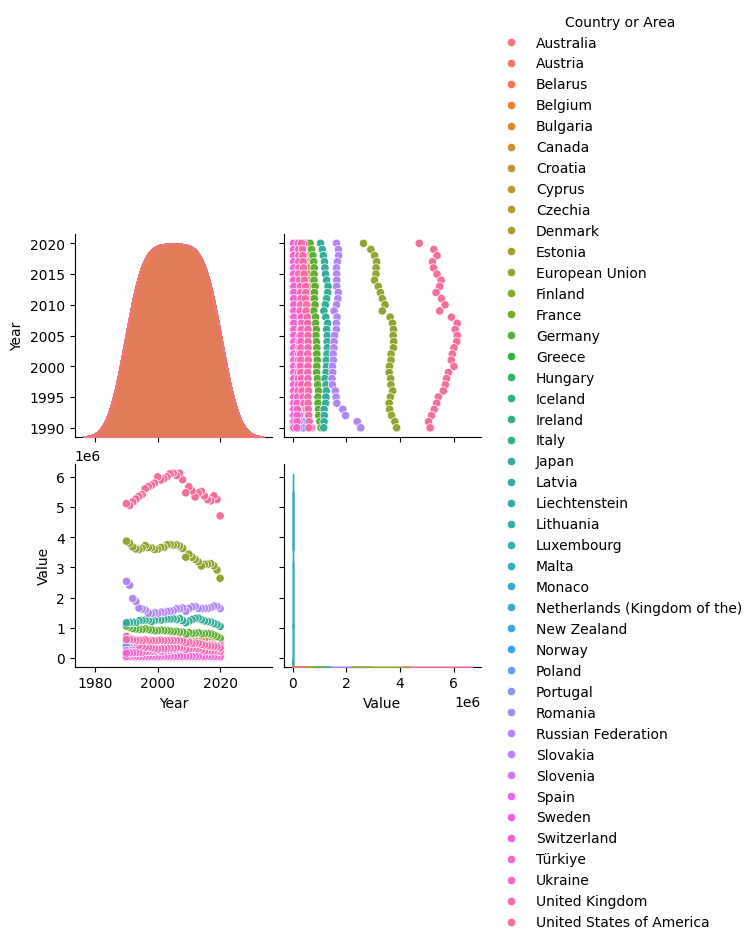

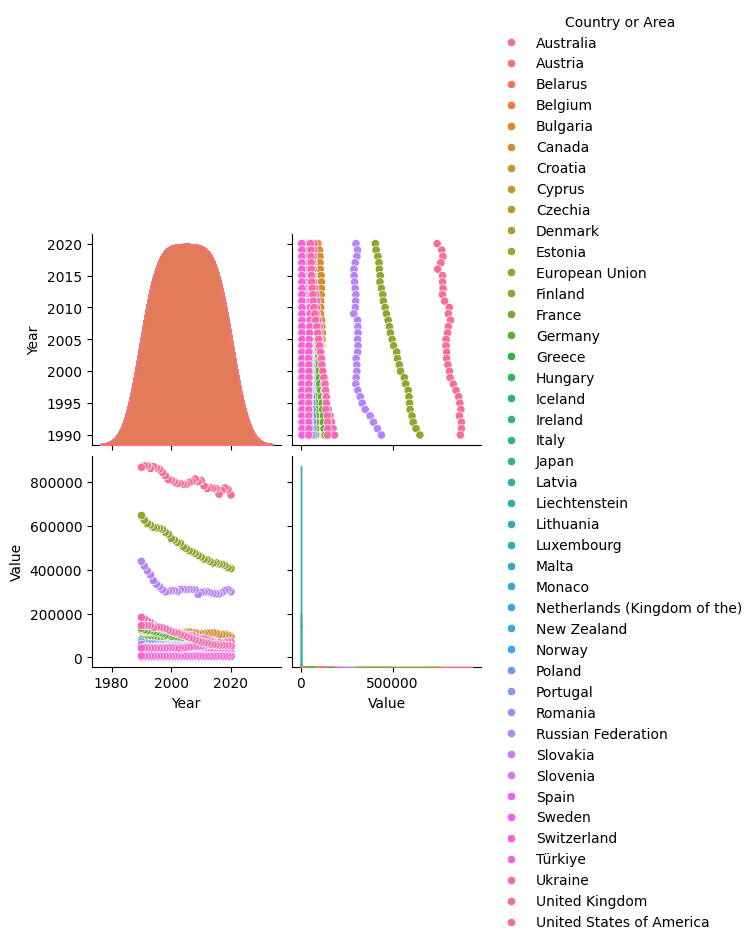

In [42]:
# Carbon Dioxide and Methane pairplots for obvious trends
sns.pairplot(carbon_dioxide_df, hue='Country or Area')
sns.pairplot(methane_df, hue='Country or Area')
plt.show()

# Year x Value seems to show most obvious trends

In [ ]:
# Plots of Year x Value for CO and Methane



In [15]:
# New Dataframe with countries and their average emissions for both CO2 and Methane
country_area = pd.Series(carbon_dioxide_df['Country or Area'].unique())
carbon_dioxide_change = []
methane_change = []


cd_country_area = (carbon_dioxide_df['Country or Area'].unique()).tolist()
me_country_area = (methane_df['Country or Area'].unique()).tolist()
# print(cd_country_area==me_country_area) # True, Same list of countries
# print(len(cd_country_area)) # 43


for i in range(len(cd_country_area)): # Repeating code, so probably could spend time to increase efficiency
    # Carbon Dioxide
    cd = pd.DataFrame(carbon_dioxide_df[carbon_dioxide_df['Country or Area']==cd_country_area[i]])
    cd_test_1990 = cd['Year'] == 1990
    cd_test_2020 = cd['Year'] == 2020
    carbon_dioxide_change.append(cd[cd_test_2020].Value.values[0] - cd[cd_test_1990].Value.values[0])
    # Methane
    me = pd.DataFrame(methane_df[methane_df['Country or Area']==me_country_area[i]])
    me_test_1990 = me['Year'] == 1990
    me_test_2020 = me['Year'] == 2020
    methane_change.append(me[me_test_2020].Value.values[0] - me[me_test_1990].Value.values[0])


# Makes combined DataFrame
direction = {'Country or Area': country_area, 'CD Change': carbon_dioxide_change, 'Methane Change': methane_change}
combined_df = pd.DataFrame(direction)
# print(combined_df.columns)

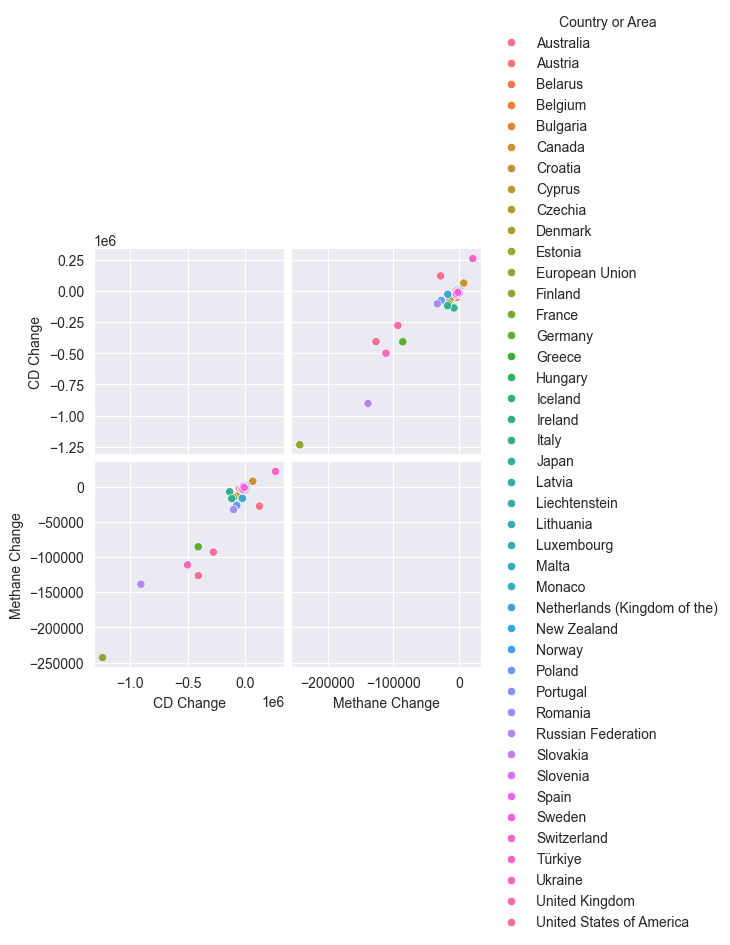

In [16]:
sns.pairplot(combined_df, hue='Country or Area')
plt.show()